### 1.1.1 ベクトルと行列

In [1]:
import numpy as np

x = np.array([1,2,3])
x.__class__


numpy.ndarray

In [2]:
x.shape

(3,)

In [3]:
x.ndim

1

In [4]:
W = np.array([[1,2,3],[4,5,6]])
W.shape

(2, 3)

In [5]:
W.ndim

2

### 1.1.2 行列の要素ごとの計算

In [6]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [7]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### 1.1.3 ブロードキャスト

In [8]:
A = np.array([[1,2],[3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [9]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

### 1.1.4 ベクトルの内積と行列の積

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
5 & 6 \\
7 & 8 \\
\end{pmatrix}
=
\begin{pmatrix}
19 & 22 \\
43 & 50 \\
\end{pmatrix}
$$

In [10]:
# ベクトルの内積
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a, b)

32

In [11]:
# 行列の積
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

### 1.2.1

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.arange(-5.0,5.0,1)
x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [14]:
y = sigmoid(x)
y

array([ 0.00669285,  0.01798621,  0.04742587,  0.11920292,  0.26894142,
        0.5       ,  0.73105858,  0.88079708,  0.95257413,  0.98201379])

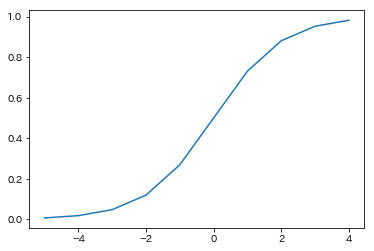

In [15]:
import matplotlib.pylab as plt
plt.plot(x,y)
plt.show()

In [16]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2= np.random.randn(3)

h = np.dot(x,W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

In [17]:
s

array([[ 0.04033242, -0.29526728, -3.68859265],
       [-0.05650516, -0.27390649, -3.63547988],
       [-0.26413152, -0.25349735, -3.93658696],
       [-0.28805686, -0.2178917 , -3.45113272],
       [-0.07259382, -0.26564212, -3.55117994],
       [ 0.28665697, -0.33224836, -3.479626  ],
       [ 0.18413345, -0.32225088, -3.67004721],
       [-0.07731701, -0.25444075, -3.39651064],
       [-0.22710732, -0.24498199, -3.6805181 ],
       [-0.08557469, -0.21840296, -2.94083533]])

### 1.2.2 順伝播

In [18]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
    def forward(self, x):
        return 1 + (1 + np.exp(-x))

In [19]:
class Affine:
    def __init__(self, W, b):
        self.params = [W,b]
    def forward(self, x):
        W,b = self.params
        out = np.dot(x,W)+b
        return out

In [20]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        # initialize weight and bias
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        # generate layer
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        # compose all weights as list
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
       

In [21]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

In [22]:
s

array([[  0.76273304,  -0.89509953,   0.50900501],
       [-56.94742517,  21.1231919 ,   4.71247151],
       [  1.04097452,   0.67826879,   1.7620373 ],
       [-24.04323   ,   7.94115112,   0.80010668],
       [  0.77998472,   0.48462465,   1.54756499],
       [ 19.30687392,  -0.9211082 ,   5.91533831],
       [-77.35398513,  27.78179104,   5.15066655],
       [ -5.48987637,   0.27362859,  -0.72240747],
       [-23.79070193,   8.06253779,   1.11176203],
       [-78.11709238,  27.85049175,   4.79379239]])

#### 1.3.4.3 Repeat node

In [31]:
import numpy as np
D,N = 8,7
x = np.random.randn(1,D)
y = np.repeat(x, N, axis=0)

In [32]:
x,y

(array([[-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462]]),
 array([[-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462],
        [-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462],
        [-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462],
        [-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462],
        [-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462],
        [-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462],
        [-0.37253944,  0.37375602,  1.27957819, -0.64796668, -0.09652328,
          0.71996184,  0.31087377, -0.14571462]]))

In [35]:
dy = np.random.randn(N, D)   # 仮の勾配
dx = np.sum(dy, axis=0, keepdims=True)

In [36]:
dx,dy

(array([[-6.70150004,  6.23040129,  0.61415943,  0.72593331,  4.2308362 ,
         -3.48898671,  0.65505102, -3.90477423]]),
 array([[-0.24725038, -0.08309596, -0.83066844, -0.33002643,  1.57544462,
         -0.2984265 , -1.62898641,  0.00759496],
        [-1.22431814,  1.44293117, -1.37157577, -0.48420589, -0.39868171,
         -0.00353563,  1.35051313, -1.01131807],
        [-0.20918713,  1.46807469, -0.37490743,  1.37849403,  1.84390898,
         -0.4928579 , -1.00426603, -1.15051859],
        [-1.50915171,  0.4226802 , -0.41785831, -0.09099948,  0.62786548,
         -0.58289168,  0.50894356,  0.44528943],
        [-0.37138783,  0.46133057,  0.79440639,  0.34290233,  0.55887665,
          0.86133911, -0.44123455, -1.06192234],
        [-0.83547931, -0.0639206 ,  0.96992432, -0.20952553,  0.65417714,
         -1.22210223,  1.7410258 , -0.41590106],
        [-2.30472554,  2.58240122,  1.84483868,  0.11929429, -0.63075497,
         -1.75051188,  0.12905551, -0.71799855]]))

#### 1.3.4.4 Sum Node

In [38]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)